In [4]:
import pandas as pd
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, LSTM, Dense,Embedding,RepeatVector,Bidirectional
from keras.models import Model
import re
import numpy as np
from scipy import stats
# import demoji
#import tokenizer
#from nltk.corpus import stopwords

from keras.utils import to_categorical


In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_list = list(set(stopwords.words('english')))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/local/ASUAD/abhatt43/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
domain1_path = "../Data/dEFEND data/gossipcop_content_no_ignore.tsv"
domain2_path = "../Data/dEFEND data/politifact_content_no_ignore.tsv"
domain1_comments_path = "../Data/dEFEND data/gossipcop_comment_no_ignore.tsv"
domain2_comments_path = "../Data/dEFEND data/politifact_comment_no_ignore.tsv"

In [15]:
domain1_frame = pd.read_csv(domain1_path,delimiter="\t").set_index('id')
domain2_frame = pd.read_csv(domain2_path,delimiter="\t").set_index('id')
domain1_comment_frame = pd.read_csv(domain1_comments_path,delimiter="\t").set_index('id')
domain2_comment_frame = pd.read_csv(domain2_comments_path,delimiter="\t").set_index('id')

### Counts for each label for the 2 domain

#### First Domain

In [17]:
domain1_frame

,label,content
id,,
gossipcop-9096198130,1,Sarah Jessica Parker is getting candid about h...
gossipcop-6982710185,1,Many celebrities have been sharing their thoug...
gossipcop-7887456921,1,He reportedly hasn't seen her in over four yea...
gossipcop-1594778479,1,The fashion crowd is speaking out about Kim Ka...
gossipcop-8172018375,1,What term do you want to search? Search with g...
...,...,...
gossipcop-854842,0,Aisha Tyler‘s divorce from Jeffrey Tietjens ha...
gossipcop-843491,0,All four of Queen Elizabeth and Prince Philip'...
gossipcop-897778,0,Theresa Caputo is adjusting to her new life af...


In [22]:
domain1_comment_frame

,comment
id,
gossipcop-9096198130,That is the weirdest thing that I ever heard E...
gossipcop-6982710185,morningjoe::Who gives a flyin squirrels testic...
gossipcop-7887456921,Him being heavy into Scientology should be eno...
gossipcop-1594778479,why is this news::the Empress wears no clothes...
gossipcop-8172018375,Q lindo::Son nom est Rai Rai monde ::The thre...
...,...
gossipcop-854842,WOW
gossipcop-843491,THE QUEEN NEEDS TO LIGHTEN UP AND COME DOWN OF...
gossipcop-897778,Damn didn’t she see it::He does seem boring as...


In [23]:
domain1_merged = pd.merge(domain1_frame, domain1_comment_frame, on=['id'], how='inner')
domain1_merged.head()

,label,content,comment
id,,,
gossipcop-9096198130,1,Sarah Jessica Parker is getting candid about h...,That is the weirdest thing that I ever heard E...
gossipcop-6982710185,1,Many celebrities have been sharing their thoug...,morningjoe::Who gives a flyin squirrels testic...
gossipcop-7887456921,1,He reportedly hasn't seen her in over four yea...,Him being heavy into Scientology should be eno...
gossipcop-1594778479,1,The fashion crowd is speaking out about Kim Ka...,why is this news::the Empress wears no clothes...
gossipcop-8172018375,1,What term do you want to search? Search with g...,Q lindo::Son nom est Rai Rai monde ::The thre...


In [24]:
domain1_merged

,label,content,comment
id,,,
gossipcop-9096198130,1,Sarah Jessica Parker is getting candid about h...,That is the weirdest thing that I ever heard E...
gossipcop-6982710185,1,Many celebrities have been sharing their thoug...,morningjoe::Who gives a flyin squirrels testic...
gossipcop-7887456921,1,He reportedly hasn't seen her in over four yea...,Him being heavy into Scientology should be eno...
gossipcop-1594778479,1,The fashion crowd is speaking out about Kim Ka...,why is this news::the Empress wears no clothes...
gossipcop-8172018375,1,What term do you want to search? Search with g...,Q lindo::Son nom est Rai Rai monde ::The thre...
...,...,...,...
gossipcop-854842,0,Aisha Tyler‘s divorce from Jeffrey Tietjens ha...,WOW
gossipcop-843491,0,All four of Queen Elizabeth and Prince Philip'...,THE QUEEN NEEDS TO LIGHTEN UP AND COME DOWN OF...
gossipcop-897778,0,Theresa Caputo is adjusting to her new life af...,Damn didn’t she see it::He does seem boring as...


In [25]:
domain2_merged = pd.merge(domain2_frame, domain2_comment_frame, on=['id'], how='inner')
domain2_merged

,label,content,comment
id,,,
politifact14856,1,Originally Posted by opsspec1991 Originally Po...,What about Nancy Pelosi I thought they skipped...
politifact13806,1,UI Notice: The comments were found not to be t...,False Thank you Snopes I thought that was just...
politifact13515,1,See more of Sid Miller on Facebook,So he’s taking credit for policies that were a...
politifact15307,1,Barack Obama has decided to spend his retireme...,I dont think he didnt have to worry about trut...
politifact15232,1,804 SHARES Share TweetAnd once again the mains...,This seems to put the claim into perspective
...,...,...,...
politifact98,0,Fred Thompson is laying on the southern-fried ...,Nobody wants to see her naked nobody::Why tho ...
politifact959,0,You are using an older browser version. Please...,They illegally obtain the transcripts in order...
politifact3428,0,Supreme Court Case: Flemming vs. NestorBackgro...,Also theres no savings account that contains m...


In [10]:
domain1_frame.groupby(['label'])[['label']].count()

,label
label,
0,3586
1,2230


#### Second Domain

In [11]:
domain2_frame.groupby(['label'])[['label']].count()

,label
label,
0,145
1,270


### Cleaning the Text

In [12]:
def clean_text(text):
    '''Clean text by removing unnecessary characters and altering the format of words.'''

    text = text.lower()
    
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = re.sub(r"[()\"_#/@;*%:{}<>`+=~|.!?,'$-\[\]]", "", text)
    text = re.sub(r"[0-9]", "", text)
    
#     for words in stopwords_list:
#         text = re.sub(r"\b{}\b".format(words),"",text)
    
    return text

In [13]:
def tagger(decoder_input_sentence):
    start = "<BOS> "
    end = " <EOS>"
    final_target = [start + text + end for text in decoder_input_sentence] 
    return final_target

In [0]:
# def tokenizer(text_lists):
#     return [line.split(" ") for line in text_lists]

In [0]:
def create_vocab(text_lists):
    tokenizer = Tokenizer(oov_token="<UNK>")
    tokenizer.fit_on_texts(text_lists)
    
    dictionary = tokenizer.word_index
    word2idx = {}
    idx2word = {}
    for k,v in dictionary.items():
        word2idx[k]=v
        idx2word[v]=k
    
    return word2idx,idx2word,tokenizer

#### Encoder Training Data

In [0]:
encoder_inputs = domain1_frame['content'].apply(lambda x: clean_text(x)).values.tolist()+ domain2_frame['content'].apply(lambda x: clean_text(x)).values.tolist()
# encoder_inputs = 
decoder_inputs = tagger(encoder_inputs[:])

#### Fake news detection training data

In [0]:
X_CC = domain1_frame['content'].apply(lambda x: clean_text(x)).values.tolist()+ domain2_frame['content'].apply(lambda x: clean_text(x)).values.tolist()
Y_CC = np.array(domain1_frame['label'].apply(lambda x:int(x)).values.tolist()+ domain2_frame['label'].apply(lambda x:int(x)).values.tolist())
Y_CC_oh = to_categorical(Y_CC)

#### Domain classification Data

In [0]:
X_DC = domain1_frame['content'].apply(lambda x: clean_text(x)).values.tolist()+ domain2_frame['content'].apply(lambda x: clean_text(x)).values.tolist()
Y_DC = np.array([0]*len(domain1_frame) + [1]*len(domain2_frame))
Y_DC_oh = to_categorical(Y_DC)

In [0]:
idx = np.arange(len(encoder_inputs))
np.random.shuffle(idx)
encoder_inputs = np.array(encoder_inputs)[idx]
decoder_inputs = np.array(decoder_inputs)[idx]
Y_CC = Y_CC[idx]
Y_DC = Y_DC[idx]
Y_CC_oh = Y_CC_oh[idx]
Y_DC_oh = Y_DC_oh[idx]

In [0]:
word2idx,idx2word,tokenizer = create_vocab(encoder_inputs)

### Due to ambiguity with regards to Keras Tokenizer num_words, below is a good enough fix, though it changes the tokenizer word_index outside of the class

In [0]:
num_words = 10000

sorted_by_word_count = sorted(tokenizer.word_counts.items(), key=lambda kv: kv[1], reverse=True)
tokenizer.word_index = {}
word2idx = {}
idx2word = {}
i = 0
for word,count in sorted_by_word_count:
    if i == num_words:
        break

    tokenizer.word_index[word] = i + 1    # <= because tokenizer is 1 indexed
    word2idx[word] = i+1
    idx2word[i+1]=word
    i += 1





In [0]:
tokenizer.word_index[tokenizer.oov_token] = num_words+1
word2idx[tokenizer.oov_token] = num_words+1
idx2word[num_words+1]=tokenizer.oov_token

In [0]:
# idx = len(tokenizer.word_index)+1
# tokenizer.word_index["<BOS>"] = idx
# word2idx["<BOS>"] = idx
# idx2word[idx] = "<BOS>"

# idx = len(tokenizer.word_index)+1
# tokenizer.word_index["<EOS>"] = idx
# word2idx["<EOS>"] = idx
# idx2word[idx] = "<EOS>"

In [28]:
word2idx["<UNK>"]

10001

In [0]:

t_encoder_inputs = tokenizer.texts_to_sequences(encoder_inputs)
t_decoder_inputs = tokenizer.texts_to_sequences(decoder_inputs)


# 
t_encoder_inputs = pad_sequences(t_encoder_inputs,maxlen=10,padding='post', truncating='post')

# t_decoder_inputs = pad_sequences(t_encoder_inputs,maxlen=100,padding='post', truncating='post')
# t_decoder_inputs = np.insert(t_decoder_inputs,0,word2idx["<BOS>"],axis=1)
# t_decoder_inputs = np.insert(t_decoder_inputs,t_decoder_inputs.shape[1],word2idx["<EOS>"],axis=1)


max_encoder_len = max([len(val) for val in t_encoder_inputs])
max_decoder_len = max([len(val) for val in t_decoder_inputs])


In [0]:
def test_generator(X,Y,Y_CC,Y_DC,batch_size=128,max_len=5):
    
        
    y_cc = to_categorical(Y_CC)
    y_dc = to_categorical(Y_DC)
    for idx in range(0,len(X),batch_size):

        encoder_input = np.zeros((batch_size,max_encoder_len))
#         decoder_input = np.zeros((batch_size,max_decoder_len))
        decoder_target = np.zeros((batch_size,max_encoder_len,len(word2idx)+1))
        for j,input_seq in enumerate(X[idx:idx+batch_size]):
            for i,word_idx in enumerate(input_seq):
                encoder_input[j,i]= word_idx
                decoder_target[j,i,word_idx] = 1
           
        yield [encoder_input,[decoder_target,y_cc[idx:idx+batch_size],y_dc[idx:idx+batch_size]]]

        

In [0]:
def all_data_generator(X,Y,Y_CC,Y_DC):
    encoder_input = np.zeros((len(X),max_encoder_len))
    decoder_input = np.zeros((len(X),max_decoder_len))
    decoder_target = np.zeros((len(X),max_encoder_len,len(word2idx)+1)) ## Extra index for padding, word2idx is 1 indexed
    for j,(input_seq,target_seq) in enumerate(zip(X,Y)):
        for i,word_idx in enumerate(input_seq):
            encoder_input[j,i]= word_idx
            decoder_target[j,i,word_idx] = 1
    
    y_cc = to_categorical(Y_CC)
    y_dc = to_categorical(Y_DC)

    return [encoder_input,[decoder_target,y_cc,y_dc]]

In [0]:
vocab_len= len(word2idx)

### Loading Glove Word Vectors

In [0]:
embeddings_index = dict()
f = open("/glove.6B.100d.txt")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [0]:
embedding_matrix = np.zeros((vocab_len+1, 100))
for word, i in word2idx.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i+1] = embedding_vector

In [37]:
embedding_matrix.shape

(10002, 100)

### Building the Final model

In [38]:
inputs = Input(shape=(max_encoder_len,),name="encoder_inputs")

encoder_embedding = Embedding(vocab_len+1,100,trainable=True,input_length=max_encoder_len,mask_zero=True,name="encoder_embedding")

encoder_inputs = encoder_embedding(inputs)


encoder = LSTM(64,return_state=True)


encoder_outputs, state_h, state_c = encoder(encoder_inputs)


encoder_states = [state_h,state_c]


########## Content Classification Part ###############

fully_connected_CC = Dense(128,
                       activation="tanh",
                       name="non_linear_CC")

logits_CC = fully_connected_CC(encoder_outputs)

softmax_layer_CC = Dense(2,
                     activation="softmax",
                     name="softmax_layer_CC")

output_CC = softmax_layer_CC(logits_CC)


######### Domain Classification Part ##############

fully_connected_DC = Dense(128,
                       activation="tanh",
                       name="non_linear_DC")

logits_DC = fully_connected_DC(encoder_outputs)

softmax_layer_DC = Dense(2,
                     activation="softmax",
                     name="softmax_layer_DC")

output_DC = softmax_layer_DC(logits_DC)


########### Autoencoder PART #############
decoder_inputs = RepeatVector(max_encoder_len)(encoder_outputs)


decoder_lstm = LSTM(64, 
                         return_state=True,
                        return_sequences=True,
                         name = 'decoder_lstm')


decoder_outputs, _, _ = decoder_lstm(decoder_inputs,initial_state=encoder_states)


decoder_dense = Dense(vocab_len+1, 
                      activation='softmax', 
                      name = 'decoder_dense')
decoder_outputs = decoder_dense(decoder_outputs)



model = Model(inputs,[decoder_outputs,output_CC,output_DC])
# model = Model(inputs,output_CC)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [39]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_inputs (InputLayer)     (None, 10)           0                                            
__________________________________________________________________________________________________
encoder_embedding (Embedding)   (None, 10, 100)      1000200     encoder_inputs[0][0]             
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 64), (None,  42240       encoder_embedding[0][0]          
__________________________________________________________________________________________________
repeat_vector_1 (RepeatVector)  (None, 10, 64)       0           lstm_1[0][0]                     
____________________________________________________________________________________________

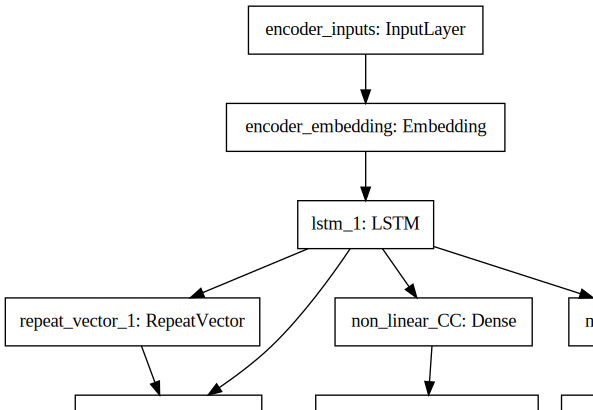

In [40]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [0]:
generator = test_generator(t_encoder_inputs,t_decoder_inputs,Y_CC,Y_DC,batch_size=len(t_encoder_inputs))
encoder_input_data,[decoder_target_data,y_cc,y_dc] = next(generator)

In [42]:
len(y_cc)

6231

In [43]:
model.compile(optimizer='rmsprop', loss=['categorical_crossentropy', 'binary_crossentropy', 'binary_crossentropy'],
             loss_weights=[0.1,0.6,-0.1],metrics=["accuracy"])
history = model.fit(encoder_input_data, 
                    [decoder_target_data,y_cc,y_dc],
                    batch_size=128,
                    validation_split=0.2,
#                     shuffle=True,
                    epochs=800)






Train on 4984 samples, validate on 1247 samples
Epoch 1/800





4984/4984 [==============================] - 38s 8ms/step - loss: 0.0284 - decoder_dense_loss: 7.7932 - softmax_layer_CC_loss: 0.6971 - softmax_layer_DC_loss: 11.6920 - decoder_dense_acc: 0.0587 - softmax_layer_CC_acc: 0.5716 - softmax_layer_DC_acc: 0.0758 - val_loss: -0.4102 - val_decoder_dense_loss: 6.9258 - val_softmax_layer_CC_loss: 0.6618 - val_softmax_layer_DC_loss: 14.9983 - val_decoder_dense_acc: 0.0724 - val_softmax_layer_CC_acc: 0.6055 - val_softmax_layer_DC_acc: 0.0642
Epoch 2/800
4984/4984 [==============================] - 34s 7ms/step - loss: -0.4278 - decoder_dense_loss: 6.7552 - softmax_layer_CC_loss: 0.6510 - softmax_layer_DC_loss: 14.9391 - decoder_dense_acc: 0.0731 - softmax_layer_CC_acc: 0.6376 - softmax_layer_DC_acc: 0.0672 - val_loss: -0.4455 - val_decoder_dense_loss: 6.8216 - val_softmax_layer_CC_loss: 0.6199 - val_softmax_layer_DC_loss: 14.9963 - val_decoder_dense_acc: 0.0724 - val_softmax_lay

### Building the Autoencoder

In [0]:
inputs = Input(shape=(max_encoder_len,),name="encoder_inputs")

encoder_embedding = Embedding(vocab_len+1,100,trainable=True,weights=[embedding_matrix],input_length=max_encoder_len,mask_zero=True,name="encoder_embedding")

encoder_inputs = encoder_embedding(inputs)

# encoder_inputs = LSTM(64,return_sequences=True)(encoder_inputs)
encoder = LSTM(64,return_state=True)

# encoder = Bidirectional(LSTM(64, 
#                     return_state=True, 
#                     name = 'encoder'))

# encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder(encoder_inputs)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# # We discard `encoder_outputs` and only keep the states.

# encoder_states = [forward_h, backward_h]
encoder_states = [state_h,state_c]

# # Set up the decoder, using `encoder_states` as initial state.



decoder_inputs = RepeatVector(max_encoder_len)(encoder_outputs)

# # We set up our decoder to return full output sequences,
# # and to return internal states as well. We don't use the
# # return states in the training model, but we will use them in inference.

decoder_lstm = LSTM(64, 
                         return_state=True,
                        return_sequences=True,
                         name = 'decoder_lstm')


# # The inital_state call argument, specifying the initial state(s) of a RNN. 
# # This is used to pass the encoder states to the decoder as initial states.
# # Basically making the first memory of the decoder the encoded semantics
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,initial_state=encoder_states)
# decoder_outputs = LSTM(128,return_sequences=True)(decoder_outputs)

# decoder_outputs = Dense(64,activation="tanh")(decoder_outputs)
decoder_dense = Dense(vocab_len+1, 
                      activation='softmax', 
                      name = 'decoder_dense')
decoder_outputs = decoder_dense(decoder_outputs)

# # Define the model that will turn
# # `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model(inputs,decoder_outputs)

In [45]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_inputs (InputLayer)     (None, 10)           0                                            
__________________________________________________________________________________________________
encoder_embedding (Embedding)   (None, 10, 100)      1000200     encoder_inputs[0][0]             
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, 64), (None,  42240       encoder_embedding[0][0]          
__________________________________________________________________________________________________
repeat_vector_2 (RepeatVector)  (None, 10, 64)       0           lstm_2[0][0]                     
____________________________________________________________________________________________

In [0]:
generator = test_generator(t_encoder_inputs,t_decoder_inputs,Y_CC,Y_DC,batch_size=150)

In [0]:
# [encoder_input_data,decoder_input_data],decoder_target_data = next(generator)
test_encoder_input_data,[test_decoder_target_data,test_y_cc,test_y_dc] = next(generator)

In [48]:
encoder_input_data,decoder_target_data = all_data_generator(t_encoder_inputs,t_decoder_inputs)

TypeError: ignored

In [0]:
test_encoder_input_data.shape

In [0]:
encoder_input_data[127]

In [0]:
# [encoder_input_data,decoder_input_data],decoder_target_data = all_data_generator(t_encoder_inputs,t_decoder_inputs)
# encoder_input_data,decoder_target_data = all_data_generator(t_encoder_inputs,t_decoder_inputs)

In [0]:
# decoder_target_data.shape

### Training the Model

In [0]:
encoder_input_data[0]

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
history = model.fit(encoder_input_data, 
                    decoder_target_data,
                    batch_size=128,
                    epochs=800)
#                     validation_split=0.2)

### Testing the Model

In [0]:
for idx in test_encoder_input_data[100]:
    print(idx2word[idx],end=" ")

In [0]:
# model.compile('rmsprop', 'mse')
output_array = model.predict([test_encoder_input_data])

In [0]:
for idx in output_array[0][28]:
    lookup = np.argmax(idx)
#     print(lookup)
    if lookup==0:
        break
    else:
        print(idx2word[lookup],end=" ")

In [0]:
for idx in output_array[100]:
    print(idx[np.argmax(20)])
    break
    lookup = np.argmax(idx)
#     print(lookup)
    if lookup==0:
        break
    else:
        print(idx2word[lookup],end=" ")